In [30]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt


def sigmoidal(t):
	return 1/(1 + np.exp(-t))


def dsigmoidal(t):
	s = sigmoidal(t)
	return s * (1 - s)


def generate_data(gamma=0.0):
	np.random.seed(99)
	n = 10
	t = np.random.rand(n) - 0.5
	noise = np.random.randn(n)*gamma
	signal = sigmoidal(t*6. + 1.)
	alpha = signal + noise
	return t, alpha


def plot(x, gamma):
	t, alpha = generate_data(gamma)
	t_axis = np.linspace(-3, 3, 50)
	plt.scatter(t, alpha)
	plt.plot(t_axis, sigmoidal(t_axis*x[0] + x[1]))
	plt.show()


def convergence_plot(delta_x_list):
	plt.plot(delta_x_list)
	plt.yscale("log")
	plt.show()


def armijo(f, x, g, d, rho=0.5, c=0.01, alpha=1, **kwargs):
	"""Armijo line search

	Parameters:
		f: callable, Function to be minimized
		x: ndarray, current iterate x
		g: ndarray, current gradient of f() at x
		d: ndarray, current descent direction, e.g. -g
		rho: [float], scaling factor of stepsize
		c: [float], factor in minimum decrease condition
		alpha: [float], start step size
		**kwargs: [keyword args]
	Returns: float"""
	f_x = f(x)

	gTd = (g.T.dot(d))[0]
	while f(x + alpha*d[:,0]) > f_x + c*alpha*gTd:
		alpha *= rho
	return alpha

t, alpha = generate_data()
# print(t, alpha)


def F(x, gamma=0):
	Fx = np.zeros([10, 1])
	for i in range(0, 10):
		Fx[i] = sigmoidal(x[0]*t[i] + x[1]) - alpha[i] + gamma * eps[i]
	return Fx



def J(x):
	j = np.zeros([10, 2])
	for i in range(0, 10):
		j[i][0] = sigmoidal(x[0]*t[i] + x[1]) * (1 - sigmoidal(x[0]*t[i] + x[1])) * t[i]
	for k in range(0, 10):
		j[k][1] = sigmoidal(x[0]*t[k] + x[1]) * (1 - sigmoidal(x[0]*t[k] + x[1]))
	return j

def f(x):
	Fx = F(x)
	return 0.5 * np.linalg.norm(Fx) ** 2

def GN(x, tol, max_iter, gamma):
    delta = list()
    for i in range(0, max_iter):
        B = np.dot(J(x).T, J(x))
        delta_x = np.linalg.solve(B, -np.dot(J(x).T, F(x, gamma)))
        tau = armijo(f, x, J(x).T.dot(F(x, gamma)), -J(x).T.dot(F(x, gamma)))
		# print("x: ", x)
		# print("tau:", tau)
		# print("delta_x: ", delta_x[:,0])
        delta.append(np.linalg.norm(delta_x[:,0]))
        if np.linalg.norm(delta_x[:,0]) < tol:
            print(f"Method converges after {i+1} iterations")
            return x, delta
        x = x + tau*delta_x[:,0]
    print("Method didn't converge. Maximum iterations reached")
    return x, delta

	
eps = np.random.randn(10)

x = np.array([1, 2])
# print(F(x))
# print(J(x))
gamma = 0
xx, delta = GN(x, 1e-6, 100, gamma)
print(xx)

Method converges after 7 iterations
[6. 1.]


In [33]:
x = np.array([1, 2])
gamma = 5e-2
xx, delta = GN(x, 1e-6, 100, gamma)
print(xx)

Method didn't converge. Maximum iterations reached
[6.00727216 1.07344717]


In [32]:
x = np.array([1, 2])
gamma = 1e-3
xx, delta = GN(x, 1e-6, 100, gamma)
print(xx)

Method didn't converge. Maximum iterations reached
[5.99979894 1.00141157]


Method converges after 7 iterations
[6. 1.]


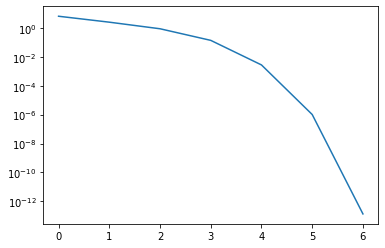

In [34]:
x = np.array([1, 2])
gamma = 0
xx, delta = GN(x, 1e-6, 100, gamma)
print(xx)
convergence_plot(delta)

Method didn't converge. Maximum iterations reached
[6.04575189 1.1527869 ]


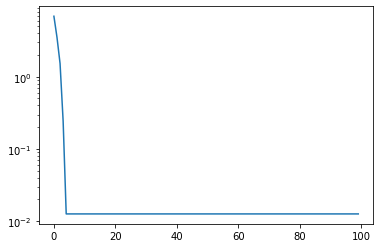

In [35]:
x = np.array([1, 2])
gamma = 1e-1
xx, delta = GN(x, 1e-6, 100, gamma)
print(xx)
convergence_plot(delta)

Method didn't converge. Maximum iterations reached
[5.99979894 1.00141157]


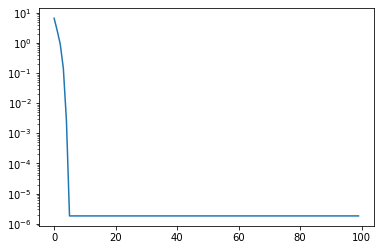

In [39]:
''' 
How do the cases γ = 1e-1, 1e-3, 0 differ? Which behaviour should be observed for γ = 0?

The plots with the values γ = 1e-1, 1e-3 reach certain points and then stop converging, 
whereas γ = 0 keeps gradually converging until it reaches the stop criterion.

'''


x = np.array([1, 2])
gamma = 1e-3
xx, delta = GN(x, 1e-6, 100, gamma)
print(xx)
convergence_plot(delta)